# UNI vs H-Optimus 

***Imports***

UNI vs H-OPTIMUS: BEST MODEL COMPARISON

UNI - Best Model: Max Pooling + LogReg
  Test AUC: 0.8000
  Test Accuracy: 0.6667

H-OPTIMUS - Best Model: Attention MIL (Ensemble)
  Test AUC: 0.6500
  Test Accuracy: 0.5556

=
DETAILED COMPARISON
    model                   method  test_auc  test_acc
      UNI     Max Pooling + LogReg      0.80  0.666667
H-OPTIMUS Attention MIL (Ensemble)      0.65  0.555556

=
PERFORMANCE DIFFERENCES
AUC Difference (H-Optimus - UNI): -0.1500 (-15.00%)
Accuracy Difference (H-Optimus - UNI): -0.1111 (-11.11%)

✓ UNI has 15.00% higher Test AUC
✓ UNI has 11.11% higher Test Accuracy


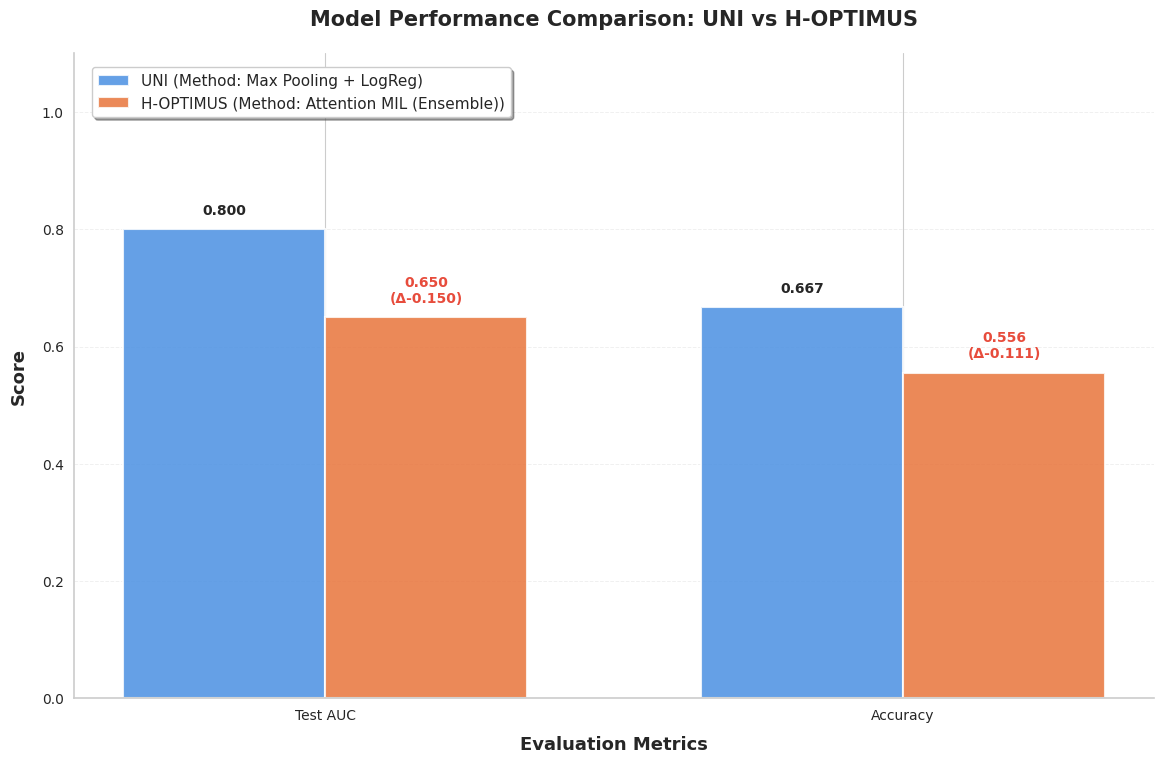

Figure saved to: uni_vs_hoptimus_comparison.png

=
SUMMARY STATISTICS
       Metric      UNI  H-OPTIMUS  Difference Winner
      Val AUC 0.666667   0.666667    0.000000    Tie
     Test AUC 0.800000   0.650000   -0.150000    UNI
Test Accuracy 0.666667   0.555556   -0.111111    UNI

=
CONCLUSION

Test Performance Winner Count:
Winner
UNI    2
Name: count, dtype: int64

 Overall Winner (Test Performance): UNI


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

# Load data
BASE_PATH = "/kaggle/input/uni-vs-h-optimus-wsi-results"

# We only need the full files which have all metrics
uni_full = pd.read_csv(f"{BASE_PATH}/uni_method_comparison_full.csv")
hop_full = pd.read_csv(f"{BASE_PATH}/hoptimus_method_comparison_full.csv")


print("UNI vs H-OPTIMUS: BEST MODEL COMPARISON")


# Function to find best model based on Test AUC
def find_best_model(full_df, model_name):
    # Check column names
    test_auc_col = 'Test AUC' if 'Test AUC' in full_df.columns else 'test_auc'
    method_col = 'Method' if 'Method' in full_df.columns else 'method'
    
    # Find best based on Test AUC
    best_idx = full_df[test_auc_col].idxmax()
    best_model_row = full_df.loc[best_idx]
    best_method = best_model_row[method_col]
    
    print(f"\n{model_name} - Best Model: {best_method}")
    print(f"  Test AUC: {best_model_row[test_auc_col]:.4f}")
    
    # Since we're using the full file, we already have all the data we need
    print(f"  Test Accuracy: {best_model_row['test_acc']:.4f}")
    
    return {
        'model': model_name,
        'method': best_method,
        'test_auc': best_model_row[test_auc_col],
        'val_auc': best_model_row.get('Val AUC', best_model_row.get('val_auc', np.nan)),
        'test_acc': best_model_row['test_acc']
    }

# Find best models
uni_best = find_best_model(uni_full, "UNI")
hop_best = find_best_model(hop_full, "H-OPTIMUS")

# Create comparison dataframe
comparison_df = pd.DataFrame([uni_best, hop_best])

print("\n" + "=" * 1)
print("DETAILED COMPARISON")

print(comparison_df[['model', 'method', 'test_auc', 'test_acc']].to_string(index=False))

# Calculate differences
print("\n" + "=" * 1)
print("PERFORMANCE DIFFERENCES")

auc_diff = hop_best['test_auc'] - uni_best['test_auc']
acc_diff = hop_best['test_acc'] - uni_best['test_acc']

print(f"AUC Difference (H-Optimus - UNI): {auc_diff:+.4f} ({auc_diff*100:+.2f}%)")
print(f"Accuracy Difference (H-Optimus - UNI): {acc_diff:+.4f} ({acc_diff*100:+.2f}%)")

if auc_diff > 0:
    print(f"\n✓ H-Optimus has {auc_diff*100:.2f}% higher Test AUC")
else:
    print(f"\n✓ UNI has {abs(auc_diff)*100:.2f}% higher Test AUC")

if acc_diff > 0:
    print(f"✓ H-Optimus has {acc_diff*100:.2f}% higher Test Accuracy")
else:
    print(f"✓ UNI has {abs(acc_diff)*100:.2f}% higher Test Accuracy")

# Visualization - Only AUC and Accuracy
metrics = ["Test AUC", "Accuracy"]
x = np.arange(len(metrics))
width = 0.35

# Extract method names - use lowercase 'model' and 'method'
uni_method = comparison_df.loc[
    comparison_df["model"] == "UNI", "method"
].values[0]
hop_method = comparison_df.loc[
    comparison_df["model"] == "H-OPTIMUS", "method"
].values[0]

# Scores - map to the display names
uni_scores = [
    comparison_df.loc[comparison_df["model"] == "UNI", "test_auc"].values[0],
    comparison_df.loc[comparison_df["model"] == "UNI", "test_acc"].values[0]
]
hop_scores = [
    comparison_df.loc[comparison_df["model"] == "H-OPTIMUS", "test_auc"].values[0],
    comparison_df.loc[comparison_df["model"] == "H-OPTIMUS", "test_acc"].values[0]
]

# Convert to numpy arrays for calculations
uni_scores = np.array(uni_scores)
hop_scores = np.array(hop_scores)

# Delta (H-OPTIMUS - UNI)
delta = hop_scores - uni_scores

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Add extra space at top for annotations
ax.set_ylim([0, 1.1])

# Plot bars
bars1 = ax.bar(
    x - width/2,
    uni_scores,
    width,
    label=f"UNI (Method: {uni_method})",
    alpha=0.85,
    color="#4A90E2",
    edgecolor="white",
    linewidth=1.5
)
bars2 = ax.bar(
    x + width/2,
    hop_scores,
    width,
    label=f"H-OPTIMUS (Method: {hop_method})",
    alpha=0.85,
    color="#E8743B",
    edgecolor="white",
    linewidth=1.5
)

# Labels
ax.set_xlabel("Evaluation Metrics", fontsize=13, fontweight="bold", labelpad=10)
ax.set_ylabel("Score", fontsize=13, fontweight="bold", labelpad=10)
ax.set_title(
    "Model Performance Comparison: UNI vs H-OPTIMUS",
    fontsize=15,
    fontweight="bold",
    pad=20
)

# Customize ticks
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11, fontweight="500")
ax.tick_params(axis='both', which='major', labelsize=10)

# Legend
ax.legend(
    fontsize=11,
    frameon=True,
    shadow=True,
    fancybox=True,
    loc='upper left',
    bbox_to_anchor=(0.01, 0.99)
)

# Grid styling
ax.grid(axis="y", alpha=0.3, linestyle="--", linewidth=0.7)
ax.set_axisbelow(True)

# Spine styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

# Annotate UNI bars
for bar in bars1:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        h + 0.02,
        f"{h:.3f}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="600"
    )

# Annotate H-OPTIMUS bars with Delta
for i, bar in enumerate(bars2):
    h = bar.get_height()
    d = delta[i]
    color = "#2ECC71" if d > 0 else "#E74C3C"
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        h + 0.02,
        f"{h:.3f}\n(Δ{d:+.3f})",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
        color=color
    )

plt.tight_layout(pad=2.0)
plt.savefig("uni_vs_hoptimus_comparison.png", dpi=300, bbox_inches="tight", facecolor='white')
plt.show()

print("Figure saved to: uni_vs_hoptimus_comparison.png")

# Summary Statistics - Only AUC and Accuracy
print("\n" + "=" * 1)
print("SUMMARY STATISTICS")

summary_data = {
    'Metric': ['Val AUC', 'Test AUC', 'Test Accuracy'],
    'UNI': [
        uni_best['val_auc'], 
        uni_best['test_auc'], 
        uni_best['test_acc']
    ],
    'H-OPTIMUS': [
        hop_best['val_auc'], 
        hop_best['test_auc'], 
        hop_best['test_acc']
    ]
}
summary_df = pd.DataFrame(summary_data)
summary_df['Difference'] = summary_df['H-OPTIMUS'] - summary_df['UNI']
summary_df['Winner'] = summary_df['Difference'].apply(lambda x: 'H-OPTIMUS' if x > 0 else 'UNI' if x < 0 else 'Tie')

print(summary_df.to_string(index=False))

print("\n" + "=" * 1)
print("CONCLUSION")


# Determine overall winner based on Test metrics
test_wins = summary_df[summary_df['Metric'].isin(['Test AUC', 'Test Accuracy'])]['Winner'].value_counts()
print("\nTest Performance Winner Count:")
print(test_wins)

if len(test_wins) > 0 and test_wins.index[0] != 'Tie':
    print(f"\n Overall Winner (Test Performance): {test_wins.index[0]}")
else:
    print("\n Overall Result: Both models perform equally on test metrics")

In [2]:
from IPython.display import FileLink

# Display download link
FileLink('uni_vs_hoptimus_comparison.png')

/kaggle/working/uni_vs_hoptimus_comparison.png